# Notebook for Determining Global Variables

__About:__  
The most challenging and most influential step in the data processing is the center finding. Use this notebook to optimize the global variables that are used in both the center finding algorithm including `CENTER_GUESS`, `RADIUS_GUESS`, `DISK_RADIUS`, and `THRESHOLD` and the masking algorithm including `MASK_CENTER`, `MASK_RADIUS`, and `ADDED_MASK`  
  
 __!! Each time you change a global variable, restart your kernel and rerun the following code blocks until you're happy with the result !!__

## Global Variable Usage
The package `gued.py` relies on a few global variables which should be optimized for each experiment. The global variables are stored in `gued_globals.py` and follow standard formatting of all caps (i.e., CENTER_GUESS = (470, 450)). 

In [1]:
%%writefile gued_globals.py
### Global Variables for s1 data set

# Variable for reading files
SEPARATORS = '_'

# Variables for Center Finding Algorithm
CENTER_GUESS = (465, 475)
RADIUS_GUESS = 35
DISK_RADIUS = 3
THRESHOLD = 0

# Variable for Generating Background
CORNER_RADIUS = 20
CHECK_NUMBER = 50

# Variables for Masking
MASK_CENTER = [525, 520]
MASK_RADIUS = 40
ADDED_MASK = []
# ADDED_MASK = [
#     [432, 464, 16],
#     [445, 440, 35], 
#     [471, 427, 22],
#     [476, 482, 35]]

# Used throughout code as the threshold for cutting out date. This is the default value but other values can be set for the functions using
# std_factor = 4
STD_FACTOR = 3

# Specifies the maximum number of workers to be used when running concurrent.futures
MAX_PROCESSORS = 6

# Adjust figure size 
FIGSIZE = (12,4)

# Path for Theory Package

PATH_DCS = 'C:\\Users\\laure\\OneDrive - University of Nebraska-Lincoln\\Documents\\Centurion Lab\\Coding Lab Notebook\\gued_package\\GUED_Analysis\\packages\\dcs_repositiory\\3.7MeV\\'
#path_dcs = '/sdf/home/l/lheald2/GUED/jupyter_notebook/user_notebooks/dcs_repository/3.7MeV/ding Lab Notebook\\gued_package\\GUED_Analysis\\packages\\dcs_repositiory\\3.7MeV\\'
#path_dcs = '/sdf/home/l/lheald2/GUED/jupyter_notebook/user_notebooks/dcs_repository/3.7MeV/


Overwriting gued_globals.py


## Import Packages

In [2]:
# Standard Packages
import numpy as np
import glob
import matplotlib.pyplot as plt
import random


# new code 
import gued

#interactive plotting 
%matplotlib widget

## Reading in Data and Visualizing

### Defining path -- Uses * to make more accessible for reading in multiple scan files

In [3]:
#data_path = 'C:\\Users\\laure\\OneDrive - University of Nebraska-Lincoln\\Documents\\Centurion Lab\\nitrophenyl code\\20180823\\Run\\*\\'
#data_path = 'C:\\Users\\laure\\OneDrive - University of Nebraska-Lincoln\\Documents\\Centurion Lab\\nitrophenyl code\\20180623\\Run\\'
data_path = "C:\\Users\\laure\\OneDrive - University of Nebraska-Lincoln\\Documents\\Centurion Lab\\QC data and code\\20200911_1229\\"
run_path = "*\\*\\ANDOR1_*.tif"

full_path = data_path + run_path
#full_path = "D:\\UED_Data\\CP Images\\ANDOR1_*.tif"
print(full_path)

files = glob.glob(full_path) 

print(len(files))


C:\Users\laure\OneDrive - University of Nebraska-Lincoln\Documents\Centurion Lab\QC data and code\20200911_1229\*\*\ANDOR1_*.tif
1081


### Reading in All Data and Getting Total Counts

In [4]:
help(gued.get_image_details)

Help on function get_image_details in module gued:

get_image_details(file_names, sort=True, filter_data=False, plot=False)
    Reads all images from input file_names and returns the data as a 3d array along with stage positions, order, and counts per image.
    
    ARGUMENTS:
    
    file_names (list):
        list of file names to be read in
    
    OPTIONAL ARGUMENTS:
    
    sort (boolean): 
        default is set to True. This arguments sorts the data based on when it was saved (i.e. file number)
    plot (boolean): 
        default is set to False. When True, a plot of the data, log(data), and histogram of counts is shown
    filter_data (boolean or list): 
        default is set to False. If you want to select only a fraction of the images, set filter_data = [min_image,]
    
    GLOBAL VARIABLES:
    
    SEPARATORS (list):
        list of strings such as '_' or '-' which are used in the file naming scheme to separate values needed for data analysis (i.e. stage
        posi

Takes ~ 30 seconds for 2000 images

Loading diffraction signal


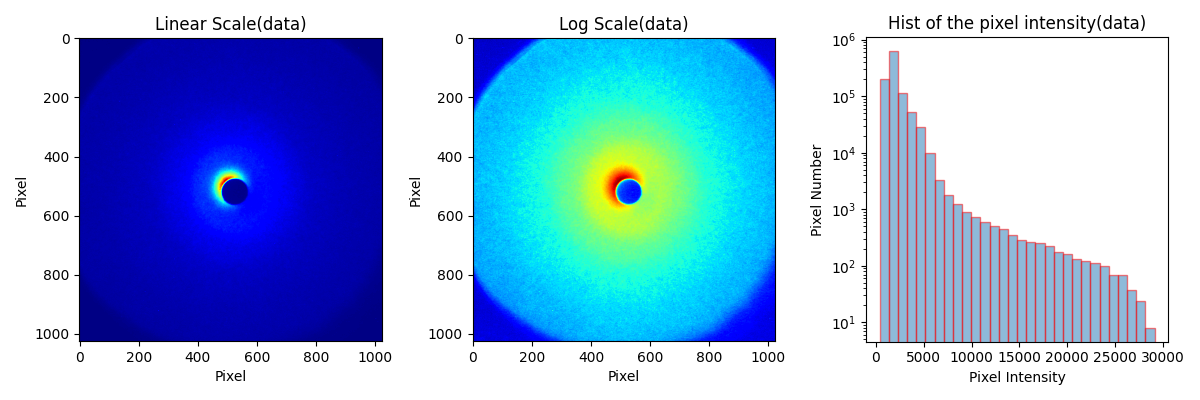

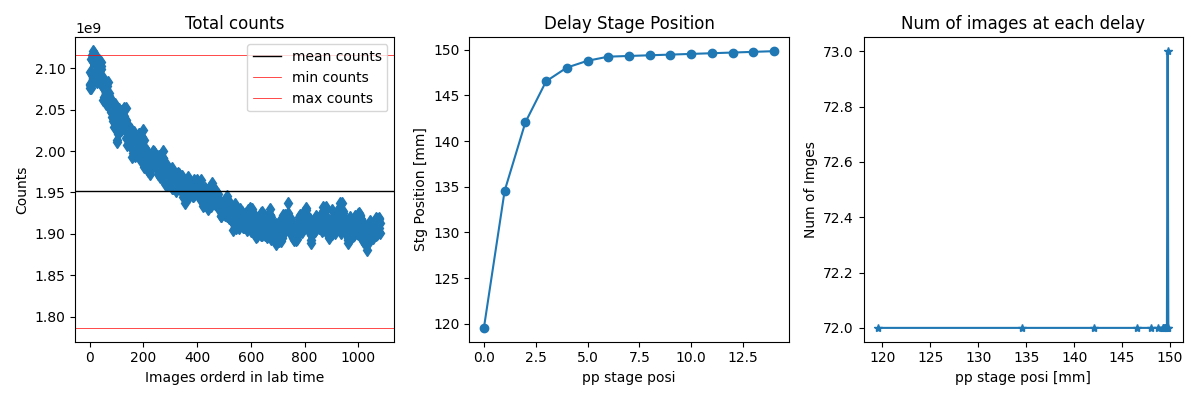

In [5]:
print('Loading diffraction signal')
data_array, stage_positions, file_numbers, counts = gued.get_image_details(files[:], sort=True, filter_data=False, plot=True)


## Create Test Set of Images and process

Need to do these steps so that variables can be used in the fast analysis notebook

In [6]:
file_numbers = list(np.arange(600, len(data_array), 1))
rand_idx = random.sample(file_numbers, 50) 
print(np.array(rand_idx))
data_array = data_array[rand_idx]
print("Removing background")
data_array = gued.remove_background_pool(data_array)
print("Removing xrays")
data_array = gued.remove_xrays_pool(data_array, plot=False)

[ 766  925  890  693  773  819  684  681  630 1036  607  734  835  741
  950  858  882 1072  637  782  868 1056  936  649  836  606  938  689
  759  698 1079 1026 1065  678  671  812  660  805  832  827 1078  750
  983 1019  651  929  690  789  736  914]
Removing background
Removing xrays
Removing hot pixels from all data


## Find Areas to Mask

In [7]:
help(gued.apply_mask) # for one image, used this function

Help on function apply_mask in module gued:

apply_mask(data_array, fill_value=nan, add_rectangular=False, plot=False, print_vals=False)
    Applies a mask to individual images in the data array.
    
    ARGUMENTS:
    
    data_array (array):
        2D or 3D array of an image or images.
    
    OPTIONAL ARUGMENTS:
    
    fill_value (int, float, or nan):
        Default set to np.nan. Value used to fill the area of the mask.
    add_rectangular (boolean)
        The default is True. Adds an additional mask with rectangular shape. 
    plot (boolean):
        Default set to False. When true, plots a figure with the original data, the masked data, and a contour map of the data
    print_vals (boolean):
        Default set to False. When true, prints the values at each contour line. Useful for setting global variables
    
    GLOBAL VARIABLES:
    
    MASK_CENTER : 1D array, tuple, or list that contains only two values
        Center for generating mask cover unscattered electron b

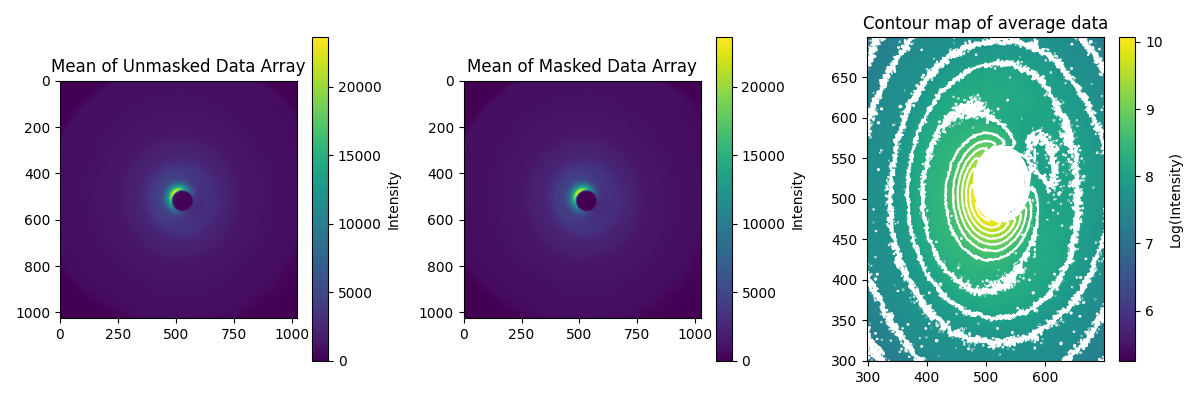

In [8]:
data_array = gued.apply_mask(data_array, fill_value=0.0, plot=True)

## Finding Diffraction Center

In [9]:
help(gued.finding_center_alg) # for one image use this function

Help on function finding_center_alg in module gued:

finding_center_alg(image, plot=False, title='Reference Image')
    Algorithm for finding the center of diffraction pattern
    
    ARGUMENTS:
    
    data_array : 2D array
        Diffraction pattern.
    
    OPTIONAL ARGUMENTS:
    
    thresh_input (float):
        Default set to 0. When zero, the threshold value is calculated using threshold_otsu from scikit-images. Often doesn't work
    plot : boolean, optional
        Show figure of the result of center finding. The default is False.
    title : str, optional
        Title of the figure. The default is 'Reference image'.
    
    
    GLOBAL VARIABLES:
    
    DISK_RADIUS : int, optional
        Generates a flat, disk-shaped footprint. The default is 3.
    CENTER_GUESS : tuple contains 2 values, optional
        Guessing center position to generate temporary mask. The default is (532, 520).
    RADIUS_GUESS : int, optional
        Guessing radius of the temporary mask. The

### Find Average Center

Adjust the `THRESHOLD` value then update the `gued_globals.py` file and restart code

In [10]:
# First, check the threshold value being calculated by the code, a good value is usually close to 100
from skimage.filters import threshold_otsu
for data in data_array:
    print(threshold_otsu(data))

2518.117931675195
2396.9786048368032
2545.431933079788
2546.7592596799877
2459.942572244932
2386.3631196542033
2479.025959440218
2531.2436032410988
2481.969816363234
2530.445203742068
2521.4766153810083
2480.7705923430503
2510.77396265255
2524.064076051951
2468.8833822233723
2532.289605199213
2505.724743849123
2576.519560127156
2561.0573791034194
2580.4064078310357
2449.3375791958065
2501.3895612251354
2524.466865159672
2399.6182076926384
2554.2712052859774
2540.50051764107
2572.3808162095393
2448.9612662524655
2486.0694370354286
2486.6303536989335
2370.600595976126
2514.9392374687795
2516.7974396540476
2433.6573640385245
2479.08941345032
2549.0916787299448
2509.296000129412
2488.807005748092
2587.102484525506
2584.4607999332407
2549.3325646063804
2487.6750271093283
2443.041655078975
2346.8205398072396
2453.3325488587698
2534.227012290133
2545.0727128213275
2514.8765274141642
2527.656703536567
2474.038821867708


In the left most graph below, you want the yellow to look circular at the smallest radius possible so adjust `THRESHOLD` value to minimize radius values and minimize range of found center values

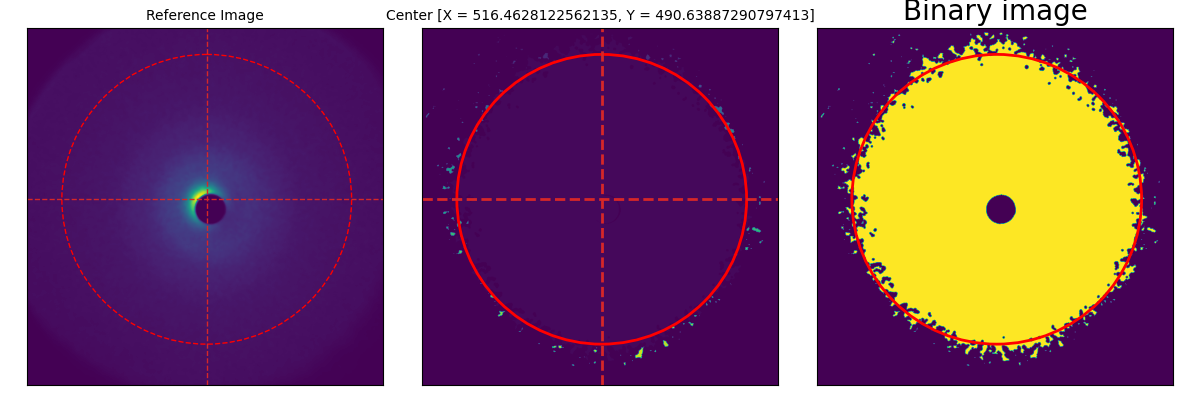

516.4628122562135 490.63887290797413


In [11]:
center_x, center_y, _, _ = gued.finding_center_alg(data_array[0], plot=True)
print(center_x, center_y)

### Find all centers 

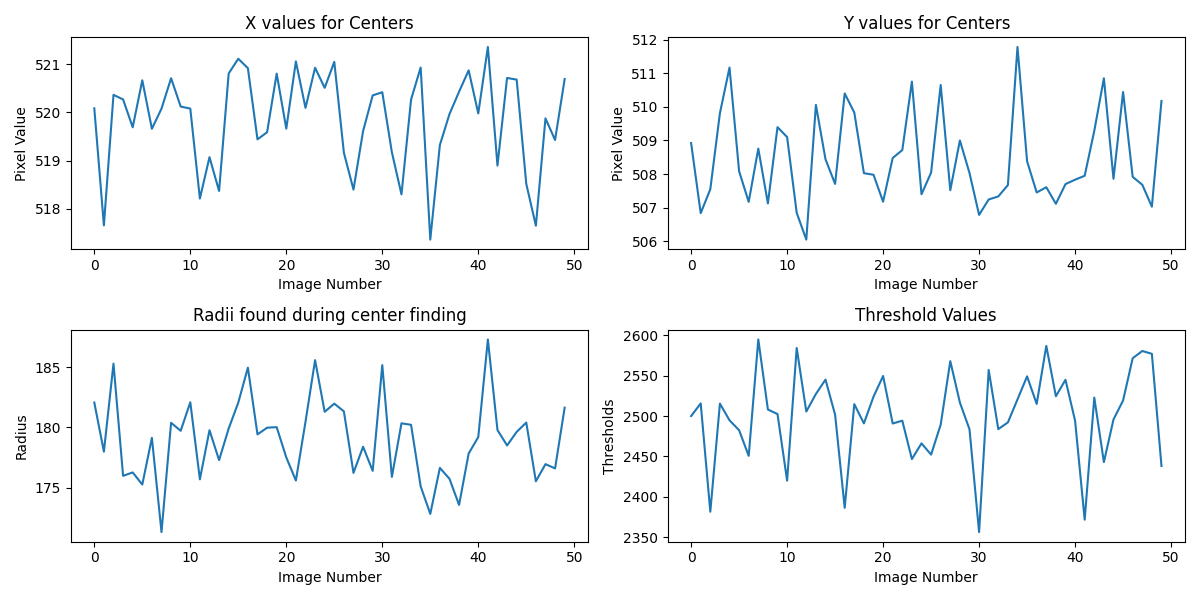

In [12]:
center_x, center_y = gued.find_center_pool(data_array, plot=True)

Now you can run the `Fast_Analysis.ipynb` notebook with the optimized global variables. 